# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [4]:
import pandas as pd


In [5]:
dados = pd.read_csv("emp_automovel.csv", sep=',')

In [6]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [7]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
modelo = DecisionTreeClassifier()
modelo.fit(x,y)
modelo.score(x,y)

1.0

In [10]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [13]:
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8487936590889296


In [14]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9206445993031359
Acurácia de validação: 0.9057573382109573


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
y_previsto = modelo.predict(x_val)
matriz_confu = confusion_matrix(y_val, y_previsto)
print(matriz_confu)

[[10356   123]
 [  959    43]]


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

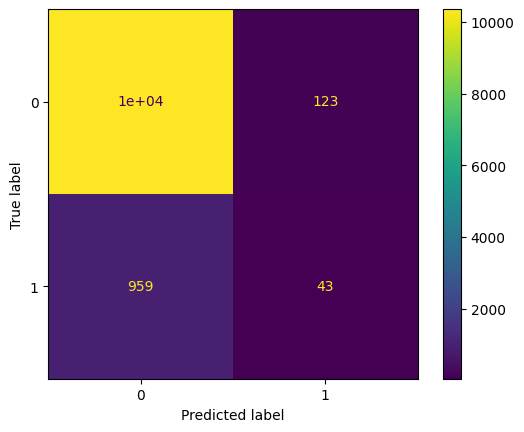

In [18]:
vizu = ConfusionMatrixDisplay(confusion_matrix = matriz_confu)
vizu.plot();

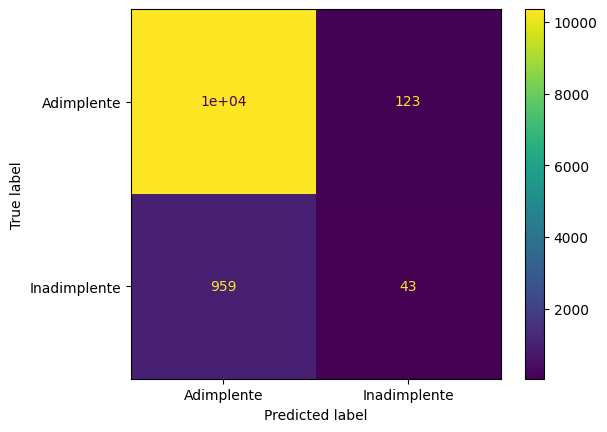

In [19]:
vizu = ConfusionMatrixDisplay(confusion_matrix = matriz_confu, display_labels=['Adimplente', 'Inadimplente'])
vizu.plot();

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')


Acurácia: 0.9057573382109573


In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.25903614457831325
Recall: 0.04291417165668663


In [24]:
from sklearn.metrics import RocCurveDisplay

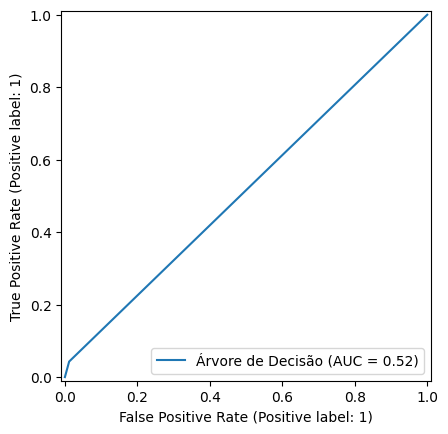

In [25]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name= 'Árvore de Decisão');

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
roc_auc_score(y_val, y_previsto)

0.5155882052099636

In [28]:
from sklearn.metrics import PrecisionRecallDisplay

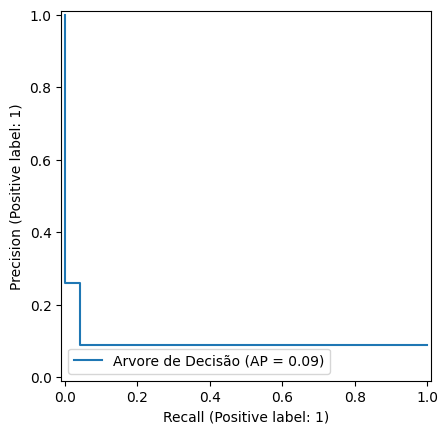

In [29]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Arvore de Decisão');

In [30]:
from sklearn.metrics import average_precision_score

In [31]:
average_precision_score(y_val, y_previsto)

0.09464563086733557

In [32]:
from  sklearn.metrics import classification_report


In [33]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [34]:
from sklearn.model_selection import cross_validate, KFold 

In [35]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5,)
cv_resultados = cross_validate(modelo, x, y, cv=kf)
cv_resultados

{'fit_time': array([0.20034862, 0.18063688, 0.19959617, 0.17327094, 0.17809057]),
 'score_time': array([0.00854182, 0.        , 0.01001835, 0.00638127, 0.00055408]),
 'test_score': array([0.91257485, 0.90831882, 0.90766551, 0.9135453 , 0.89939024])}

In [36]:
cv_resultados['test_score']

array([0.91257485, 0.90831882, 0.90766551, 0.9135453 , 0.89939024])

In [37]:
media = cv_resultados['test_score'].mean()
dp = cv_resultados['test_score'].std()

print(f'Intervalo de confiança:[{media - 2*dp},{min(media + 2*dp, 1)}]')

Intervalo de confiança:[0.8982760019890698,0.9183218823815614]


In [38]:
def intervalo(cv_resultados):
    media = cv_resultados['test_score'].mean()
    dp = cv_resultados['test_score'].std()
    print(f'Intervalo de confiança:[{media - 2*dp},{min(media + 2*dp, 1)}]')

In [39]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5,)
resultados = cross_validate(modelo, x, y, cv=kf, scoring='recall')
resultados

{'fit_time': array([0.1808753 , 0.17605805, 0.1518302 , 0.16937685, 0.16285181]),
 'score_time': array([0.        , 0.00389957, 0.01558518, 0.        , 0.        ]),
 'test_score': array([0.02642008, 0.0210396 , 0.01845018, 0.01305483, 0.02312139])}

In [40]:
intervalo(resultados)

Intervalo de confiança:[0.011392441705275301,0.02944199241189354]


In [41]:
dados['inadimplente'].value_counts(normalize=True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [42]:
from sklearn.model_selection import StratifiedKFold

In [43]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

cv_resultados = cross_validate(modelo, x, y, cv=skf, scoring='recall')

In [44]:
intervalo(cv_resultados)

Intervalo de confiança:[0.01754496499849191,0.03882596784418293]


In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [47]:
y_balanceado.value_counts(normalize=True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [48]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring='recall')

In [49]:
intervalo(cv_resultados)

Intervalo de confiança:[0.6934196543794195,0.7753262905120055]


In [51]:
from imblearn.pipeline import Pipeline as imbpipe

In [52]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipe([('oversample',SMOTE()),('arvore', modelo)])

In [53]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring='recall')

In [54]:
intervalo(cv_resultados)

Intervalo de confiança:[0.20569173362338283,0.3076491339330693]


In [55]:
from imblearn.under_sampling import NearMiss

In [56]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipe([('undersample', NearMiss(version=3)),('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring='recall')

In [57]:
intervalo(cv_resultados)

Intervalo de confiança:[0.6267120794862455,0.6987893977818824]


              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



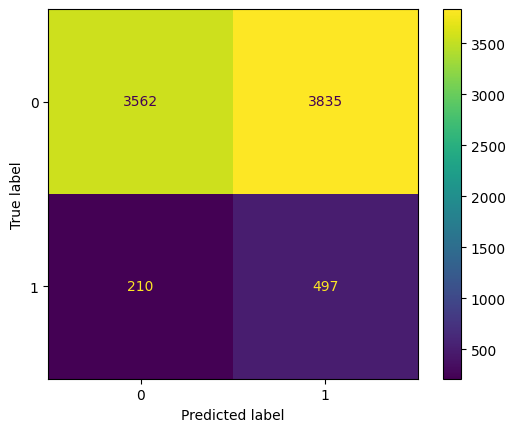

In [58]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto)